# Import

In [2]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Definition of Functions

In [3]:
# https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059
def getData(url):
    
    #Create a handle, page, to handle the contents of the website
    page = requests.get(url)
    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')
    
    #Create empty list
    col=[]
    i=0
    #For each row, store each first element (header) and an empty list
    for t in tr_elements[0]:
        i+=1
        name=t.text_content()
        col.append((name,[]))

    #Since out first row is the header, data is stored on the second row onwards
    for j in range(1,len(tr_elements)):
        #T is our j'th row
        T=tr_elements[j]

        #If row is not of size 10, the //tr data is not from our table 
        if len(T)!=10:
            break

        #i is the index of our column
        i=0

        #Iterate through each element of the row
        for t in T.iterchildren():
            data=t.text_content() 
            #Check if row is empty
            if i>0:
            #Convert any numerical value to integers
                try:
                    data=int(data)
                except:
                    pass
            #Append the data to the empty list of the i'th column
            col[i][1].append(data)
            #Increment i for the next column
            i+=1

    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    return df

In [4]:
def addWinRate(df):
    df['win_rate'] = df['S'] / df['Sp.']

In [5]:
def getFigures(df):
    var_real = np.var(df['win_rate'])
    var_luck = math.sqrt(0.5*(0.5/df['Sp.'].sum()/2))
    var_skill = var_real - var_luck
    
    contribution_luck = var_luck / var_real
    contribution_skill = var_skill / var_real

    print('var_luck:', var_luck)
    print('var_real:', var_real)
    print('var_skill:', var_skill)
    print('contribution_luck:', contribution_luck)
    print('contribution_skill:', contribution_skill)

In [6]:
def getContrSkill(df):
    var_real = np.var(df['win_rate'])
    var_luck = math.sqrt(0.5*(0.5/df['Sp.'].sum()/2))
    var_skill = var_real - var_luck
        
    contribution_skill = var_skill / var_real
    return contribution_skill

In [7]:
def getContrLuck(df):
    var_real = np.var(df['win_rate'])
    var_luck = math.sqrt(0.5*(0.5/df['Sp.'].sum()/2))
    
    contribution_luck = var_luck / var_real
    return contribution_luck

In [8]:
def getListLuck(list_df):
    list_contr_luck = []
    for df in list_df:
        list_contr_luck.append(getContrLuck(df))
    return list_contr_luck

In [9]:
def getListSkill(list_df):
    list_contr_skill = []
    for df in list_df:
        list_contr_skill.append(getContrSkill(df))
    return list_contr_skill

In [10]:
seasons = [11,12,13,14,15,16,17,18,19,20]

# Spain

In [11]:
list_df_spain = []
list_df_spain.append(getData('https://www.fussballdaten.de/spanien/2011/tabelle/'))
list_df_spain.append(getData('https://www.fussballdaten.de/spanien/2012/tabelle/'))
list_df_spain.append(getData('https://www.fussballdaten.de/spanien/2013/tabelle/'))
list_df_spain.append(getData('https://www.fussballdaten.de/spanien/2014/tabelle/'))
list_df_spain.append(getData('https://www.fussballdaten.de/spanien/2015/tabelle/'))
list_df_spain.append(getData('https://www.fussballdaten.de/spanien/2016/tabelle/'))
list_df_spain.append(getData('https://www.fussballdaten.de/spanien/2017/tabelle/'))
list_df_spain.append(getData('https://www.fussballdaten.de/spanien/2018/tabelle/'))
list_df_spain.append(getData('https://www.fussballdaten.de/spanien/2019/tabelle/'))
list_df_spain.append(getData('https://www.fussballdaten.de/spanien/2020/tabelle/'))

In [12]:
for df in list_df_spain:
    addWinRate(df)

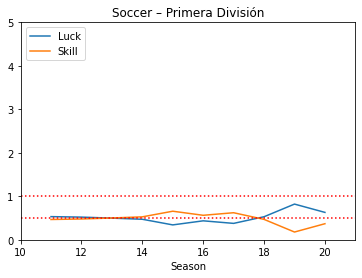

In [13]:
list_contr_luck_spain = getListLuck(list_df_spain)
list_contr_skill_spain = getListSkill(list_df_spain)
plt.plot(seasons, list_contr_luck_spain, label='Luck')
plt.plot(seasons, list_contr_skill_spain, label='Skill')
plt.legend(loc="upper left")
x_coordinates = [10, 21]
y_coordinates = [1, 1]
y_coordinates0_5 = [0.5, 0.5]

plt.plot(x_coordinates, y_coordinates, color='red', linestyle='dotted')
plt.plot(x_coordinates, y_coordinates0_5, color='red', linestyle='dotted')

plt.xlabel('Season')
plt.axis([10,21, 0, 5])
plt.title('Soccer – Primera División')
plt.show()

# England

In [14]:
list_df_england = []
list_df_england.append(getData('https://www.fussballdaten.de/england/2011/tabelle/'))
list_df_england.append(getData('https://www.fussballdaten.de/england/2012/tabelle/'))
list_df_england.append(getData('https://www.fussballdaten.de/england/2013/tabelle/'))
list_df_england.append(getData('https://www.fussballdaten.de/england/2014/tabelle/'))
list_df_england.append(getData('https://www.fussballdaten.de/england/2015/tabelle/'))
list_df_england.append(getData('https://www.fussballdaten.de/england/2016/tabelle/'))
list_df_england.append(getData('https://www.fussballdaten.de/england/2017/tabelle/'))
list_df_england.append(getData('https://www.fussballdaten.de/england/2018/tabelle/'))
list_df_england.append(getData('https://www.fussballdaten.de/england/2019/tabelle/'))
list_df_england.append(getData('https://www.fussballdaten.de/england/2020/tabelle/'))

In [15]:
for df in list_df_england:
    addWinRate(df)

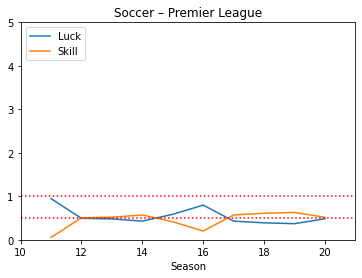

In [16]:
list_contr_luck_england = getListLuck(list_df_england)
list_contr_skill_england = getListSkill(list_df_england)
plt.plot(seasons, list_contr_luck_england, label='Luck')
plt.plot(seasons, list_contr_skill_england, label='Skill')
plt.legend(loc="upper left")
x_coordinates = [10, 21]
y_coordinates = [1, 1]
y_coordinates0_5 = [0.5, 0.5]

plt.plot(x_coordinates, y_coordinates, color='red', linestyle='dotted')
plt.plot(x_coordinates, y_coordinates0_5, color='red', linestyle='dotted')

plt.xlabel('Season')
plt.axis([10,21, 0, 5])
plt.title('Soccer – Premier League')
plt.show()

# Germany

In [17]:
list_df_ger = []
list_df_ger.append(getData('https://www.fussballdaten.de/bundesliga/2011/tabelle/'))
list_df_ger.append(getData('https://www.fussballdaten.de/bundesliga/2012/tabelle/'))
list_df_ger.append(getData('https://www.fussballdaten.de/bundesliga/2013/tabelle/'))
list_df_ger.append(getData('https://www.fussballdaten.de/bundesliga/2014/tabelle/'))
list_df_ger.append(getData('https://www.fussballdaten.de/bundesliga/2015/tabelle/'))
list_df_ger.append(getData('https://www.fussballdaten.de/bundesliga/2016/tabelle/'))
list_df_ger.append(getData('https://www.fussballdaten.de/bundesliga/2017/tabelle/'))
list_df_ger.append(getData('https://www.fussballdaten.de/bundesliga/2018/tabelle/'))
list_df_ger.append(getData('https://www.fussballdaten.de/bundesliga/2019/tabelle/'))
list_df_ger.append(getData('https://www.fussballdaten.de/bundesliga/2020/tabelle/'))

In [18]:
for df in list_df_ger:
    addWinRate(df)

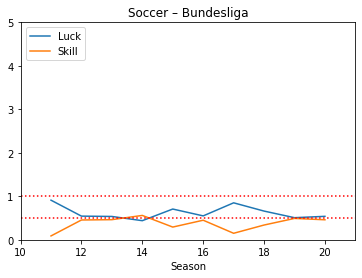

In [19]:
list_contr_luck_ger = getListLuck(list_df_ger)
list_contr_skill_ger = getListSkill(list_df_ger)
plt.plot(seasons, list_contr_luck_ger, label='Luck')
plt.plot(seasons, list_contr_skill_ger, label='Skill')
plt.legend(loc="upper left")
x_coordinates = [10, 21]
y_coordinates = [1, 1]
y_coordinates0_5 = [0.5, 0.5]

plt.plot(x_coordinates, y_coordinates, color='red', linestyle='dotted')
plt.plot(x_coordinates, y_coordinates0_5, color='red', linestyle='dotted')

plt.xlabel('Season')
plt.axis([10,21, 0, 5])
plt.title('Soccer – Bundesliga')
plt.show()

# Contribution Luck - alle Ligen

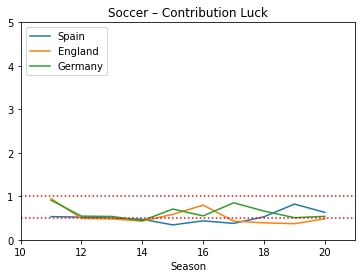

In [20]:
plt.plot(seasons, list_contr_luck_spain, label='Spain')
plt.plot(seasons, list_contr_luck_england, label='England')
plt.plot(seasons, list_contr_luck_ger, label='Germany')
plt.legend(loc="upper left")
x_coordinates = [10, 21]
y_coordinates = [1, 1]
y_coordinates0_5 = [0.5, 0.5]

plt.plot(x_coordinates, y_coordinates, color='red', linestyle='dotted')
plt.plot(x_coordinates, y_coordinates0_5, color='red', linestyle='dotted')

plt.xlabel('Season')
plt.axis([10,21, 0, 5])
plt.title('Soccer – Contribution Luck')
plt.show()

## Durchschnitt alle Ligen Fussball

In [21]:
list_contr_soccer = []
for i in range(0, 10):
    list_contr_soccer.append((list_contr_luck_spain[i]+list_contr_luck_england[i]+list_contr_luck_ger[i])/3)

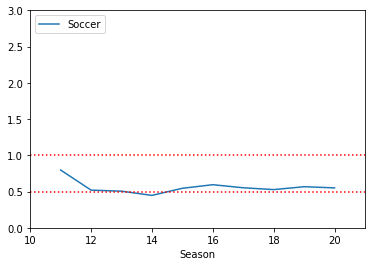

In [22]:
plt.plot(seasons, list_contr_soccer, label='Soccer')
plt.legend(loc="upper left")

x_coordinates = [10, 21]
y_coordinates = [1, 1]
y_coordinates0_5 = [0.5, 0.5]

plt.plot(x_coordinates, y_coordinates, color='red', linestyle='dotted')
plt.plot(x_coordinates, y_coordinates0_5, color='red', linestyle='dotted')

plt.xlabel('Season')
plt.axis([10,21, 0, 3])
plt.show()

# Import Daten andere Sportarten

In [23]:
list_nhl = [0.995698235, 1.113777833, 0.784031895, 0.753793241, 0.676725772, 0.792471343, 0.792471343, 0.695448932, 0.840988779, 1.057096769]
list_nba_east = [0.354150796, 0.360357983, 0.397124168, 0.420847241, 0.447689555, 0.423325316, 0.741624314, 0.508456104, 0.384141221, 0.374519937]
list_nba_west = [0.434993799, 0.614249498, 0.447267551, 0.4482817, 0.323032204, 0.283979114, 0.41411349, 0.387909775, 0.58276988, 0.550349792]
list_ih = [0.475933226, 0.778290804, 0.898027851, 0.968117829, 1.067011586, 1.438146051, 0.806764858, 1.061305642, 0.987383856, 1.58771324]

## Durchschnitt NBA

In [24]:
list_contr_nba = []
for i in range(0, 10):
    list_contr_nba.append((list_nba_east[i]+list_nba_west[i])/2)

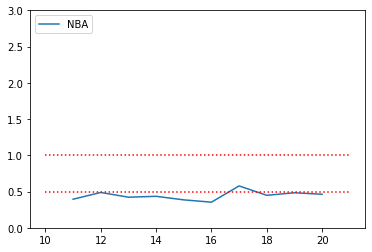

In [25]:
plt.plot(seasons, list_contr_nba, label='NBA')
plt.legend(loc="upper left")
plt.ylim(0, 3)

x_coordinates = [10, 21]
y_coordinates = [1, 1]
y_coordinates0_5 = [0.5, 0.5]

plt.plot(x_coordinates, y_coordinates, color='red', linestyle='dotted')
plt.plot(x_coordinates, y_coordinates0_5, color='red', linestyle='dotted')
plt.show()

# Vergleich Sportarten

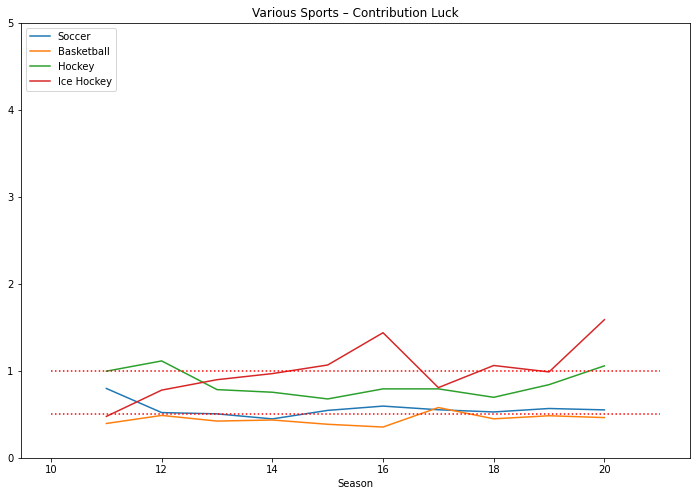

In [26]:
plt.figure(figsize=(12,8))
plt.plot(seasons, list_contr_soccer, label='Soccer')
plt.plot(seasons, list_contr_nba, label='Basketball')
plt.plot(seasons, list_nhl, label='Hockey')
plt.plot(seasons, list_ih, label='Ice Hockey')

plt.ylim(0, 5)
x_coordinates = [10, 21]
y_coordinates1 = [1, 1]
y_coordinates0_5 = [0.5, 0.5]

plt.plot(x_coordinates, y_coordinates1, color='red', linestyle='dotted')
plt.plot(x_coordinates, y_coordinates0_5, color='red', linestyle='dotted')

plt.xlabel('Season')
plt.legend(loc="upper left")
plt.title('Various Sports – Contribution Luck')
plt.show()